In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [2]:
data=pd.read_csv('Conversation.csv')
data.head()

,Unnamed: 0,question,answer
0,0,"hi, how are you doing?",i'm fine. how about yourself?
1,1,i'm fine. how about yourself?,i'm pretty good. thanks for asking.
2,2,i'm pretty good. thanks for asking.,no problem. so how have you been?
3,3,no problem. so how have you been?,i've been great. what about you?
4,4,i've been great. what about you?,i've been good. i'm in school right now.


In [3]:
data.describe()

,Unnamed: 0
count,11175.000000
mean,5587.000000
std,3226.088963
min,0.000000
25%,2793.500000
50%,5587.000000
75%,8380.500000
max,11174.000000


In [4]:
data.isna().sum()

Unnamed: 0    0
question      0
answer        0
dtype: int64

In [5]:
data.isnull().sum()

Unnamed: 0    0
question      0
answer        0
dtype: int64

In [6]:
data.drop(columns='Unnamed: 0',inplace=True)
data.head()

,question,answer
0,"hi, how are you doing?",i'm fine. how about yourself?
1,i'm fine. how about yourself?,i'm pretty good. thanks for asking.
2,i'm pretty good. thanks for asking.,no problem. so how have you been?
3,no problem. so how have you been?,i've been great. what about you?
4,i've been great. what about you?,i've been good. i'm in school right now.


In [7]:
# Let's perform NLP operations ['details','ingredients']

import nltk
import string
nltk.download('stopwords')
nltk.download('punkt')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import re

# Define stopwords and stemmer
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

# Define preprocessing function
def preprocess_text(text):

    # Convert text to lowercase
    text = text.lower()
    
    # remove punctuation from the text
    text = text.translate(str.maketrans("", "", string.punctuation))

    # Tokenize text
    words = word_tokenize(text)
    
    # Remove stopwords and stem words
    words = [stemmer.stem(word) for word in words if word not in stop_words]
    
    # Join words back into text
    # text = ' '.join(words)
    
    return words

# Apply preprocessing function to review_text column

data['question_tokenized'] = data['question'].apply(preprocess_text)
data['answer_tokenized'] = data['answer'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gurda\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gurda\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [8]:
data.head()

,question,answer,question_tokenized,answer_tokenized
0,"hi, how are you doing?",i'm fine. how about yourself?,[hi],"[im, fine]"
1,i'm fine. how about yourself?,i'm pretty good. thanks for asking.,"[im, fine]","[im, pretti, good, thank, ask]"
2,i'm pretty good. thanks for asking.,no problem. so how have you been?,"[im, pretti, good, thank, ask]",[problem]
3,no problem. so how have you been?,i've been great. what about you?,[problem],"[ive, great]"
4,i've been great. what about you?,i've been good. i'm in school right now.,"[ive, great]","[ive, good, im, school, right]"


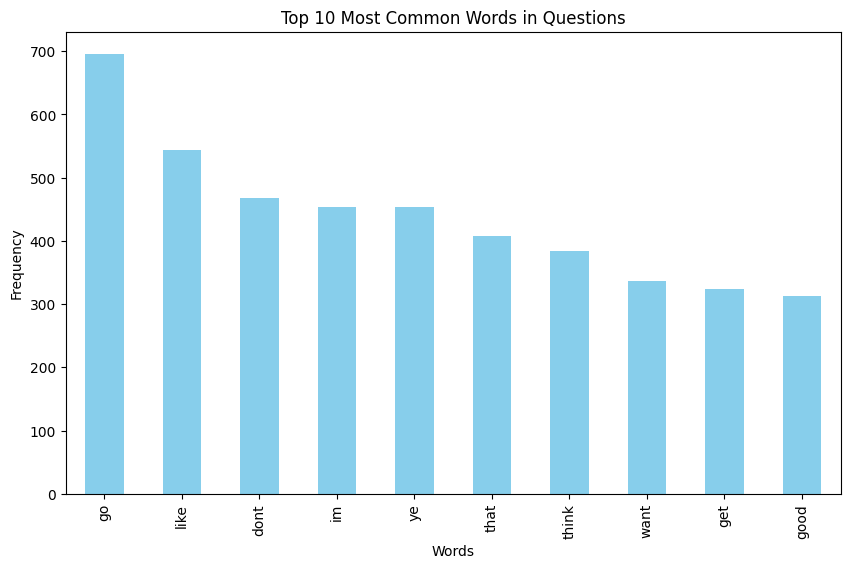

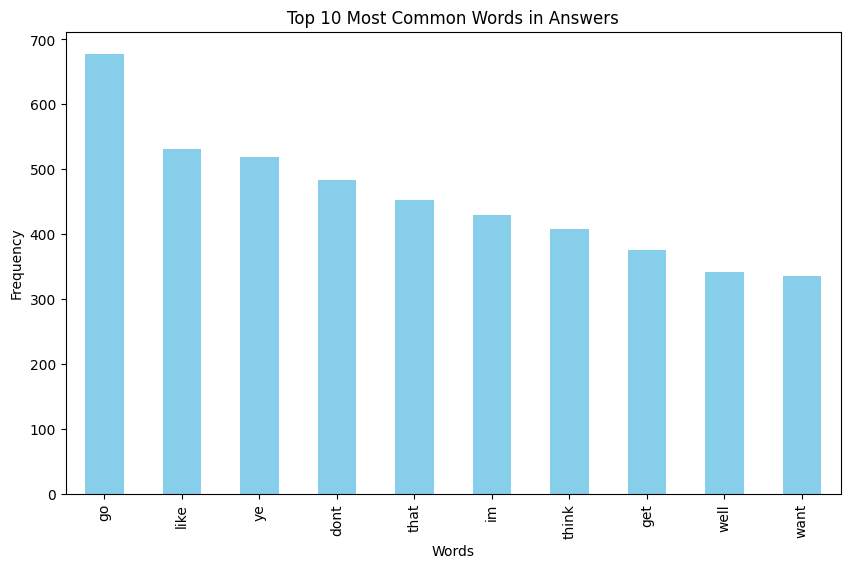

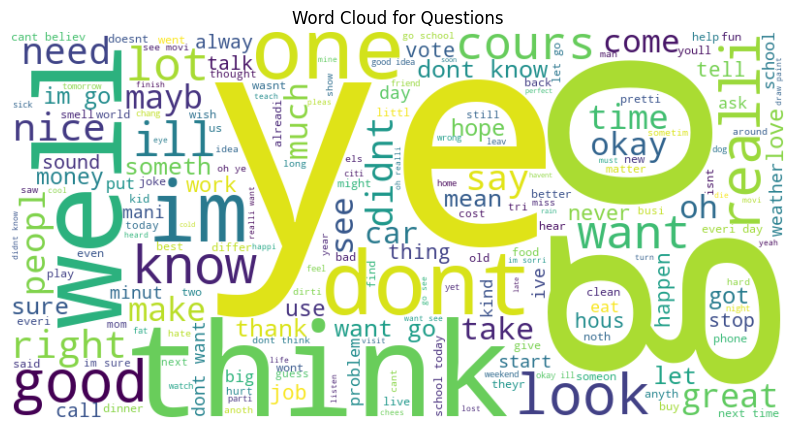

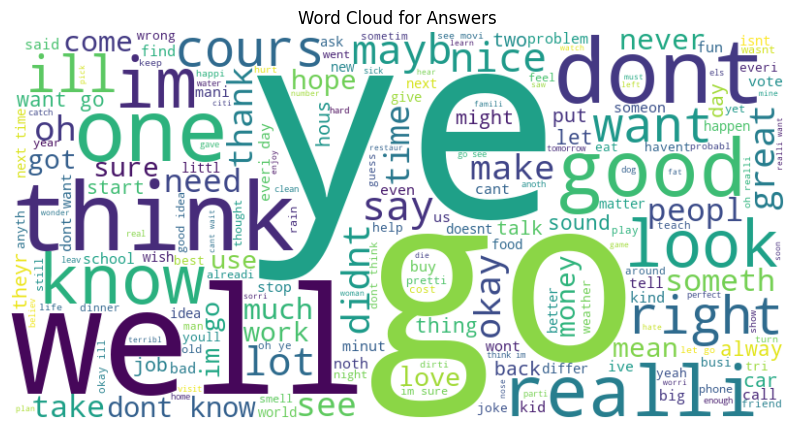

In [10]:
from wordcloud import WordCloud
# Word Frequency Analysis
def word_frequency(tokens, title):
    flattened_tokens = [token for sublist in tokens for token in sublist]
    word_freq = pd.Series(flattened_tokens).value_counts()
    
    plt.figure(figsize=(10, 6))
    word_freq[:10].plot(kind='bar', color='skyblue')
    plt.title(f'Top 10 Most Common Words in {title}')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.show()

word_frequency(data['question_tokenized'], 'Questions')
word_frequency(data['answer_tokenized'], 'Answers')

# Word Clouds
def generate_word_cloud(tokens, title):
    flattened_tokens = ' '.join([token for sublist in tokens for token in sublist])
    
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(flattened_tokens)
    
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {title}')
    plt.axis('off')
    plt.show()

generate_word_cloud(data['question_tokenized'], 'Questions')
generate_word_cloud(data['answer_tokenized'], 'Answers')

# Text Length Analysis

C:\Users\gurda\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\gurda\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


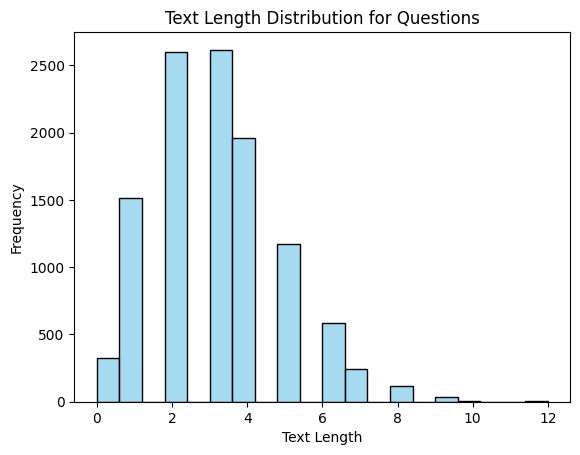

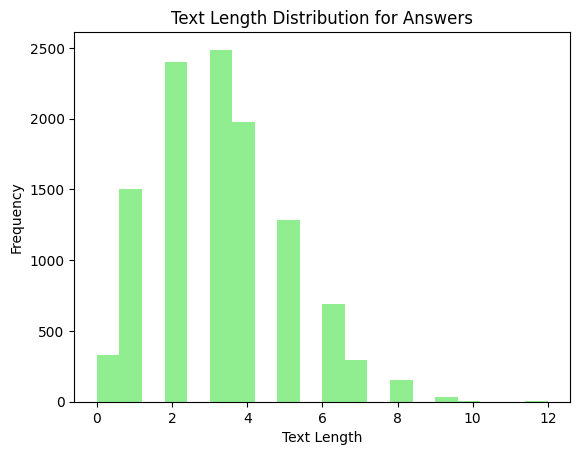

In [11]:
# Calculate and visualize text length distribution for questions
question_lengths = data['question_tokenized'].apply(len)
sns.histplot(question_lengths, bins=20, color='skyblue')
plt.title('Text Length Distribution for Questions')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

# Repeat the same for answers
answer_lengths = data['answer_tokenized'].apply(len)
plt.hist(answer_lengths, bins=20, color='lightgreen')
plt.title('Text Length Distribution for Answers')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()


# Vocabulary Size Analysis

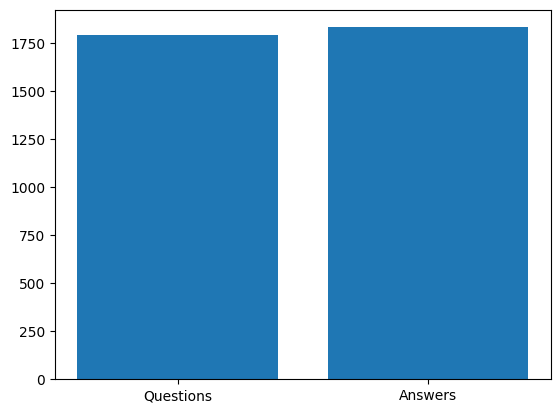

In [12]:
import matplotlib.pyplot as plt

question_vocab_size = len(set(word for sublist in data['question_tokenized'] for word in sublist))
answer_vocab_size = len(set(word for sublist in data['answer_tokenized'] for word in sublist))

plt.bar(['Questions', 'Answers'], [question_vocab_size, answer_vocab_size])
plt.show()


# N-Gram Analysis

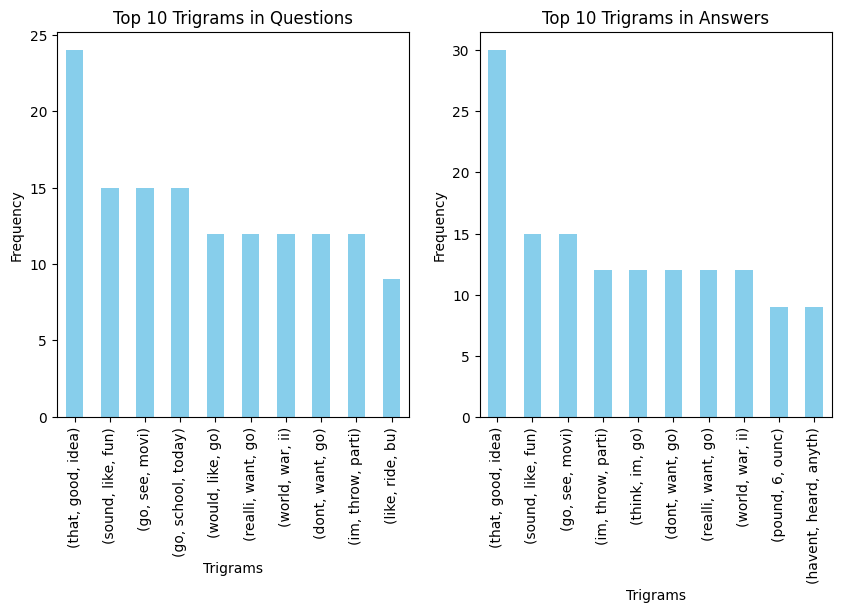

In [13]:
import matplotlib.pyplot as plt
from nltk.util import ngrams

# Function to extract n-grams from a list of tokens
def extract_ngrams(tokens, n):
    return list(ngrams(tokens, n))

# Example: Extract and count trigrams from questions
question_trigrams = data['question_tokenized'].apply(lambda x: extract_ngrams(x, 3))
question_trigram_freq = pd.Series([item for sublist in question_trigrams for item in sublist]).value_counts()

# Example: Extract and count trigrams from answers
answer_trigrams = data['answer_tokenized'].apply(lambda x: extract_ngrams(x, 3))
answer_trigram_freq = pd.Series([item for sublist in answer_trigrams for item in sublist]).value_counts()

# Plot both graphs in the same figure
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
question_trigram_freq[:10].plot(kind='bar', color='skyblue', ax=axs[0])
axs[0].set_title('Top 10 Trigrams in Questions')
axs[0].set_xlabel('Trigrams')
axs[0].set_ylabel('Frequency')
answer_trigram_freq[:10].plot(kind='bar', color='skyblue', ax=axs[1])
axs[1].set_title('Top 10 Trigrams in Answers')
axs[1].set_xlabel('Trigrams')
axs[1].set_ylabel('Frequency')
plt.show()


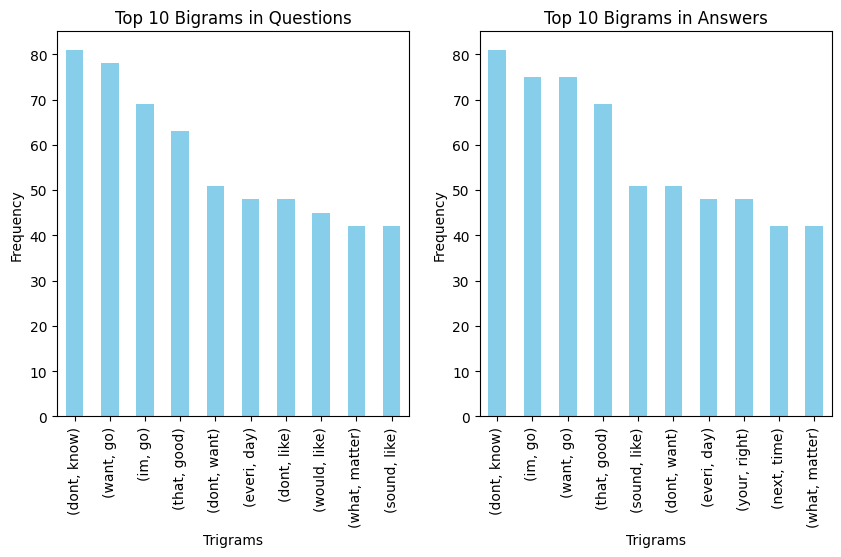

In [14]:
import matplotlib.pyplot as plt
from nltk.util import ngrams

# Function to extract n-grams from a list of tokens
def extract_ngrams(tokens, n):
    return list(ngrams(tokens, n))

# Example: Extract and count trigrams from questions
question_trigrams = data['question_tokenized'].apply(lambda x: extract_ngrams(x, 2))
question_trigram_freq = pd.Series([item for sublist in question_trigrams for item in sublist]).value_counts()

# Example: Extract and count trigrams from answers
answer_trigrams = data['answer_tokenized'].apply(lambda x: extract_ngrams(x, 2))
answer_trigram_freq = pd.Series([item for sublist in answer_trigrams for item in sublist]).value_counts()

# Plot both graphs in the same figure
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
question_trigram_freq[:10].plot(kind='bar', color='skyblue', ax=axs[0])
axs[0].set_title('Top 10 Bigrams in Questions')
axs[0].set_xlabel('Trigrams')
axs[0].set_ylabel('Frequency')
answer_trigram_freq[:10].plot(kind='bar', color='skyblue', ax=axs[1])
axs[1].set_title('Top 10 Bigrams in Answers')
axs[1].set_xlabel('Trigrams')
axs[1].set_ylabel('Frequency')
plt.show()


# Sentiment Analysis

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\gurda\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


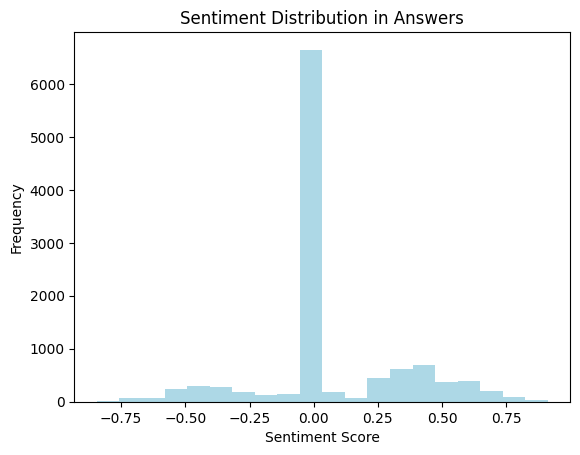

In [15]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

nltk.download('vader_lexicon')

# Initialize the sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Example: Analyze sentiment for each answer
data['answer_sentiment'] = data['answer_tokenized'].apply(lambda x: analyzer.polarity_scores(' '.join(x))['compound'])

# Visualize the sentiment distribution
plt.hist(data['answer_sentiment'], bins=20, color='lightblue')
plt.title('Sentiment Distribution in Answers')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()


# Topic Modelling

In [53]:

from gensim import corpora, models

# Prepare the corpus and dictionary
answer_corpus = [answer for sublist in data['answer_tokenized'] for answer in sublist]
dictionary = corpora.Dictionary([answer_corpus])

# Create a document-term matrix
doc_term_matrix = [dictionary.doc2bow(answer) for answer in data['answer_tokenized']]

# Perform LDA topic modeling
lda_model = models.LdaModel(doc_term_matrix, num_topics=3, id2word=dictionary, passes=15)

# Print the topics
for topic in lda_model.print_topics():
    print(topic)


(0, '0.043*"ye" + 0.026*"good" + 0.015*"money" + 0.015*"didnt" + 0.015*"that" + 0.014*"need" + 0.013*"say" + 0.012*"got" + 0.011*"much" + 0.010*"oh"')
(1, '0.037*"like" + 0.035*"dont" + 0.029*"im" + 0.029*"go" + 0.028*"think" + 0.022*"get" + 0.016*"want" + 0.015*"ill" + 0.014*"know" + 0.014*"right"')
(2, '0.022*"that" + 0.019*"would" + 0.018*"realli" + 0.017*"lot" + 0.016*"go" + 0.014*"nice" + 0.014*"what" + 0.013*"cant" + 0.013*"sure" + 0.012*"well"')


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Convert doc_term_matrix to a dense array
doc_term_matrix_dense = np.array([[(1 if term_id in doc else 0) for term_id in range(len(dictionary))] for doc in doc_term_matrix])

# Example: Compute cosine similarity between pairs of answers
cosine_sim_matrix = cosine_similarity(doc_term_matrix_dense)
print(cosine_sim_matrix)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [58]:
# Name Entity Recognition
import spacy

# Load spaCy NER model
nlp = spacy.load("en_core_web_sm")

# Example: Extract named entities from answers
data['answer_entities'] = data['answer_tokenized'].apply(lambda x: [ent.text for ent in nlp(' '.join(x)).ents])

# Display named entities
for entities in data['answer_entities']:
    print(entities)


[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['summer', 'today']
[]
[]
[]
[]
['realli wish']
['winter']
['winter']
[]
[]
[]
['summer']
[]
['nineti']
['exactli']
[]
['one day']
['winter']
[]
[]
[]
[]
['summer']
[]
[]
[]
[]
[]
['winter']
['winter']
['winter summer']
[]
[]
[]
[]
[]
[]
[]
[]
[]
['today']
[]
[]
['today']
[]
[]
[]
[]
[]
[]
[]
['today']
[]
[]
[]
[]
[]
[]
[]
['night']
[]
[]
['today']
[]
['weekend']
[]
['believ']
[]
[]
['california']
['one']
['realli wish']
['activ']
[]
['trip beach']
['weekend']
[]
[]
['realli hope']
[]
['california']
[]
[]
[]
[]
[]
['weekend']
[]
[]
['weekend']
[]
['california']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['mayb']
[]
['tomorrow']
[]
[]
[]
[]
[]
[]
['tomorrow']
[]
[]
[]
[]
[]
[]
['today']
[]
[]
['someth']
['tomorrow']
[]
[]
[]
[]
[]
[]
[]
[]
[]
['she five feet']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['five feet']
[]
['first']
[]
[]
['believ']
[]
['one']
[]
[]
[]
['five feet']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


In [57]:
# !python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.0/12.8 MB 445.2 kB/s eta 0:00:29
     --------------------------------------- 0.1/12.8 MB 657.6 kB/s eta 0:00:20
      --------------------------------------- 0.3/12.8 MB 1.8 MB/s eta 0:00:08
     ---- ----------------------------------- 1.4/12.8 MB 6.8 MB/s eta 0:00:02
     --------- ------------------------------ 3.1/12.8 MB 13.1 MB/s eta 0:00:01
     --------------- ------------------------ 5.1/12.8 MB 18.2 MB/s eta 0:00:01
     ----------------------- ---------------- 7.5/12.8 MB 22.8 MB/s eta 0:00:01
     ------------------------------ --------- 9.6/12.8 MB 26.7 MB/s eta 0:00:01
     ----------------------------------- --- 11.7/12.8 MB 50.4 MB/s eta 0:00:01
     --------------------------------------  12.8/12.8 MB 46.7 MB/s eta 0:00:01
     --------------------------------------- 12.8/12.8 MB 